/tmp/ipykernel_63517/1160769633.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['primary_date'].dt.year


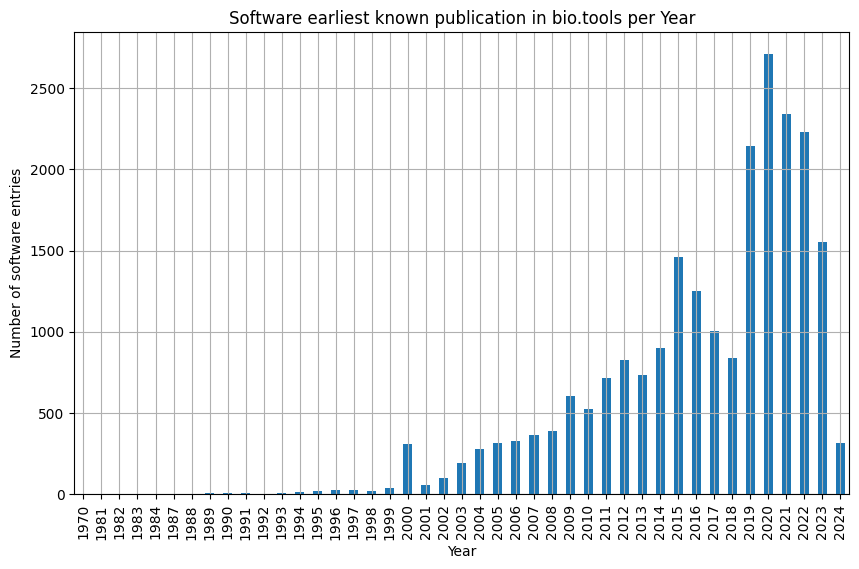

In [1]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def extract_info_from_json(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    
    biotoolsID = data.get('biotoolsID')
    primary_date = None
    #print([(publi.get('type'),publi.get('metadata',{}).get('date')) for publi in data.get('publication',[])])
    all_publication_date_strings = [publi.get('metadata',{}).get('date') for publi in data.get('publication',[])]
    all_publication_dates = [datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ") for date_string in all_publication_date_strings if date_string is not None]
    earliest_publication_date = None
    if all_publication_dates:
        earliest_publication_date = max(all_publication_dates)
    
    # for publication in data.get('publication',[]):
    #     for pub_type in publication.get('type', []):
    #         if 'Primary' in pub_type:
    #             primary_date = publication.get('metadata',{}).get('date')
    #             break
    #     if primary_date:  # Break outer loop if primary date is found
    #         break
    
    return biotoolsID, earliest_publication_date

def plot_histogram(df):
    # Convert primary_date to datetime
    df['primary_date'] = pd.to_datetime(df['primary_date'], errors='coerce')

    # Drop rows where primary_date could not be parsed
    df = df.dropna(subset=['primary_date'])

    # Extract the year from the primary_date
    df['year'] = df['primary_date'].dt.year

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    df['year'].value_counts().sort_index().plot(kind='bar')
    plt.title('Software earliest known publication in bio.tools per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of software entries')
    plt.grid(True)
    plt.show()

glob_pattern = 'data/*/*.biotools.json'  # Glob pattern for the JSON files
results = []

for filepath in glob.glob(glob_pattern):
    biotoolsID, primary_date = extract_info_from_json(filepath)
    results.append({'file': filepath, 'biotoolsID': biotoolsID, 'primary_date': primary_date})

# Load the results into a Pandas DataFrame
df = pd.DataFrame(results)

# Print the DataFrame
#print(df)

# Plot the histogram
plot_histogram(df)

In [2]:
# Ensure the primary_date column is in datetime format
df['primary_date'] = pd.to_datetime(df['primary_date'], errors='coerce')

# Filter the DataFrame to get rows where the year is 2000
filtered_df = df[df['primary_date'].dt.year == 2000]

# Print the filtered DataFrame
print(filtered_df)

# the anomaly in 2000 is EMBOSS!

                                               file    biotoolsID primary_date
80             data/edialign/edialign.biotools.json      edialign   2000-06-01
169    data/seqretsetall/seqretsetall.biotools.json  seqretsetall   2000-06-01
184    data/three_to_one/three_to_one.biotools.json  three_to_one   2000-01-01
220      data/extractfeat/extractfeat.biotools.json   extractfeat   2000-06-01
345                data/codcmp/codcmp.biotools.json        codcmp   2000-06-01
...                                             ...           ...          ...
29692      data/newcpgseek/newcpgseek.biotools.json    newcpgseek   2000-06-01
29931              data/findkm/findkm.biotools.json        findkm   2000-06-01
29934        data/infoalign/infoalign.biotools.json     infoalign   2000-06-01
30004              data/drtext/drtext.biotools.json        drtext   2000-06-01
30011  data/maskambignuc/maskambignuc.biotools.json  maskambignuc   2000-06-01

[311 rows x 3 columns]
